In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2020-12-29T17:00:00,8,Emilia-Romagna,2598,221,2819,53993,56812,-1486,894,...,90.0,19303.0,3835.0,-1443.0,7.84,4.96,4.63,23.31,0.45,-2.55
309,2020-12-30T17:00:00,8,Emilia-Romagna,2641,230,2871,53186,56057,-755,1427,...,69.0,18360.0,4928.0,-807.0,8.01,5.12,7.77,28.96,4.07,-1.33
310,2020-12-31T17:00:00,8,Emilia-Romagna,2629,233,2862,54484,57346,1289,2116,...,55.0,15735.0,6030.0,1298.0,8.14,4.99,13.45,35.09,1.30,2.30
311,2021-01-01T17:00:00,8,Emilia-Romagna,2643,231,2874,53913,56787,-559,2629,...,70.0,11372.0,4486.0,-571.0,8.04,5.06,23.12,58.60,-0.86,-0.97


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 2, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2035
Nuovi tamponi: 5281.0
Percentuale nuovi positivi/nuovi tamponi: 39.0 %
Nuovi guariti: 272.0
Nuovi deceduti: 38.0
Variazione positivi ricoverati con sintomi: 6.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: 1715.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 2, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-03T17:00:00,8,Emilia-Romagna,1464,153,1617,26731,28348,1856,1912,...,23.0,23700.0,8793.0,1759.0,9.46,5.70,8.07,21.74,10.87,7.01
1,2020-11-04T17:00:00,8,Emilia-Romagna,1554,161,1715,28259,29974,1626,1758,...,12.0,18401.0,8354.0,1528.0,9.39,5.72,9.55,21.04,5.23,5.74
2,2020-11-05T17:00:00,8,Emilia-Romagna,1588,177,1765,30211,31976,2002,2180,...,13.0,20332.0,7558.0,1952.0,10.03,5.52,10.72,28.84,9.94,6.68
3,2020-11-06T17:00:00,8,Emilia-Romagna,1673,177,1850,31880,33730,1754,1953,...,40.0,20847.0,7906.0,1669.0,9.57,5.48,9.37,24.70,0.00,5.49
4,2020-11-07T17:00:00,8,Emilia-Romagna,1723,188,1911,33738,35649,1919,2009,...,29.0,20218.0,8497.0,1858.0,9.84,5.36,9.94,23.64,6.21,5.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-29T17:00:00,8,Emilia-Romagna,2598,221,2819,53993,56812,-1486,894,...,90.0,19303.0,3835.0,-1443.0,7.84,4.96,4.63,23.31,0.45,-2.55
57,2020-12-30T17:00:00,8,Emilia-Romagna,2641,230,2871,53186,56057,-755,1427,...,69.0,18360.0,4928.0,-807.0,8.01,5.12,7.77,28.96,4.07,-1.33
58,2020-12-31T17:00:00,8,Emilia-Romagna,2629,233,2862,54484,57346,1289,2116,...,55.0,15735.0,6030.0,1298.0,8.14,4.99,13.45,35.09,1.30,2.30
59,2021-01-01T17:00:00,8,Emilia-Romagna,2643,231,2874,53913,56787,-559,2629,...,70.0,11372.0,4486.0,-571.0,8.04,5.06,23.12,58.60,-0.86,-0.97


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

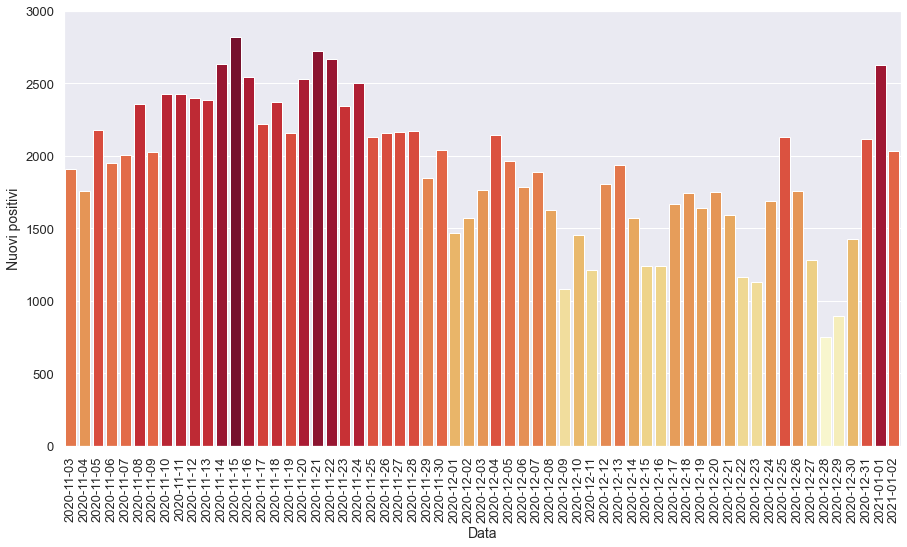

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

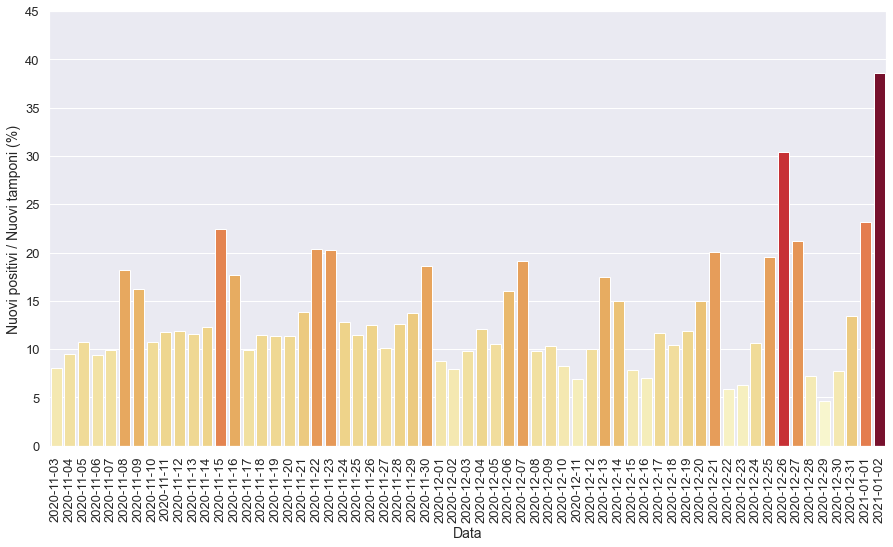

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

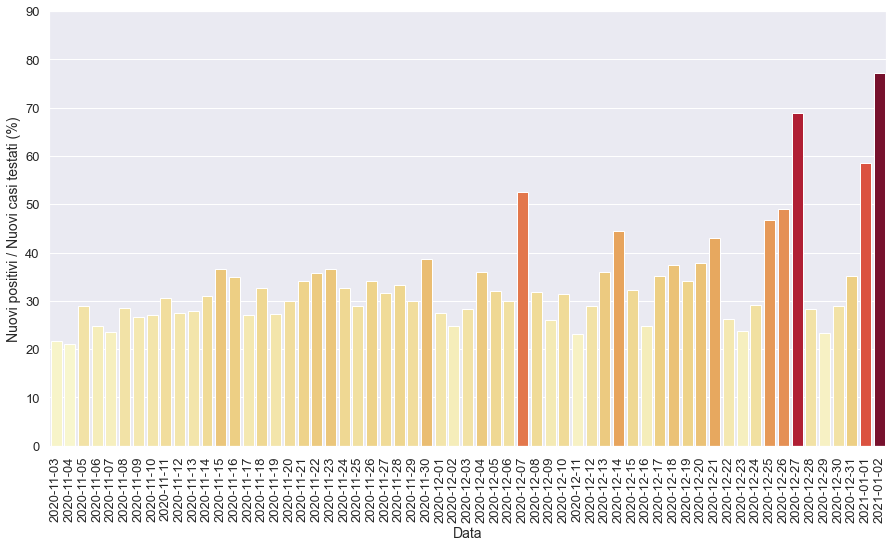

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

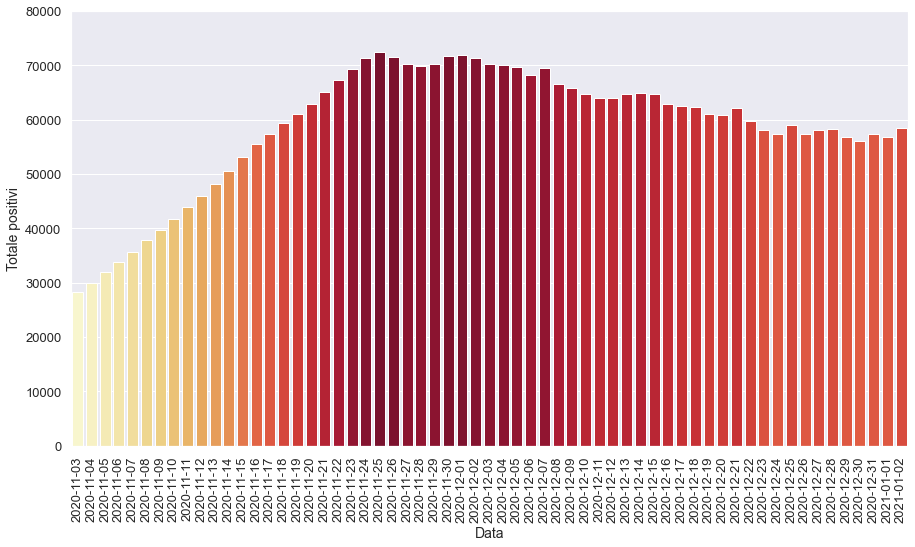

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

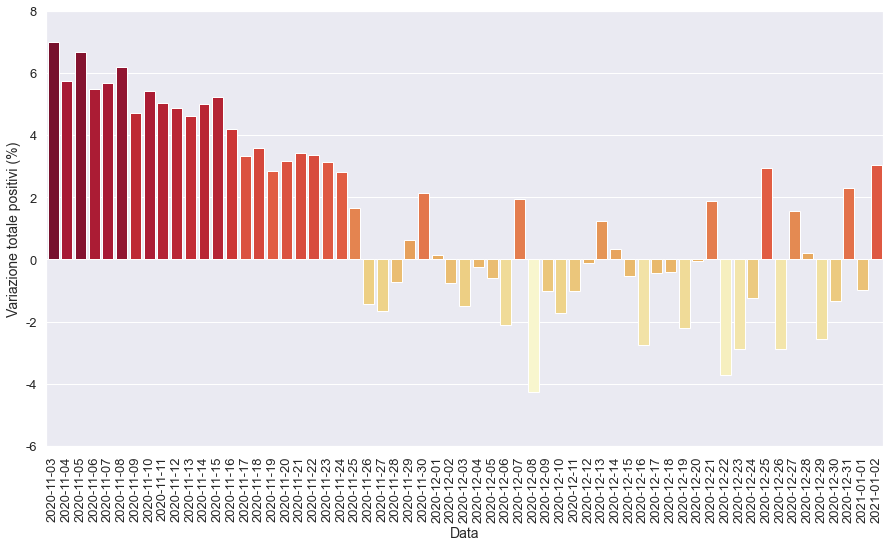

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

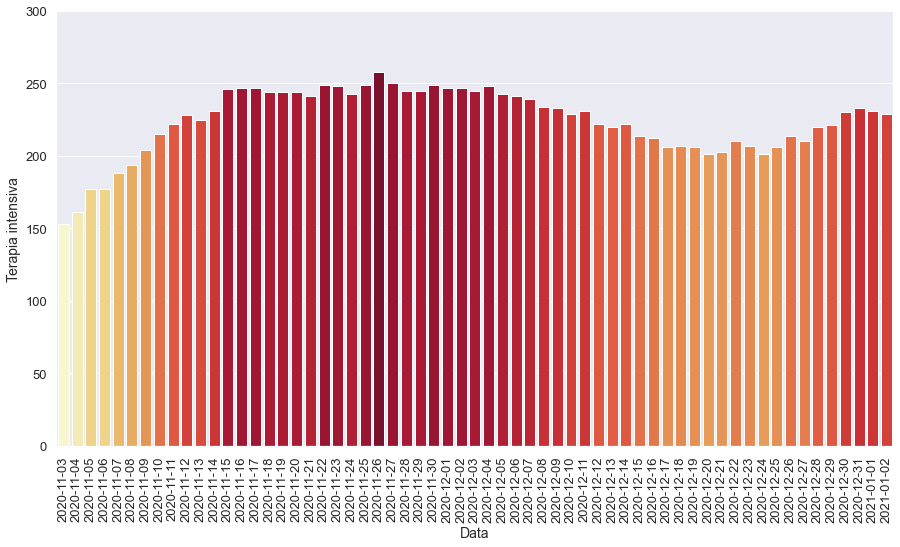

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

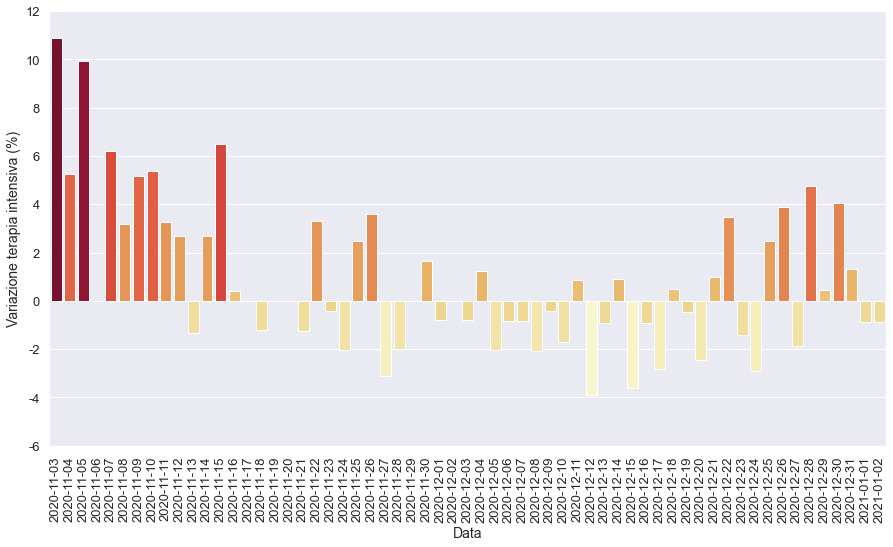

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

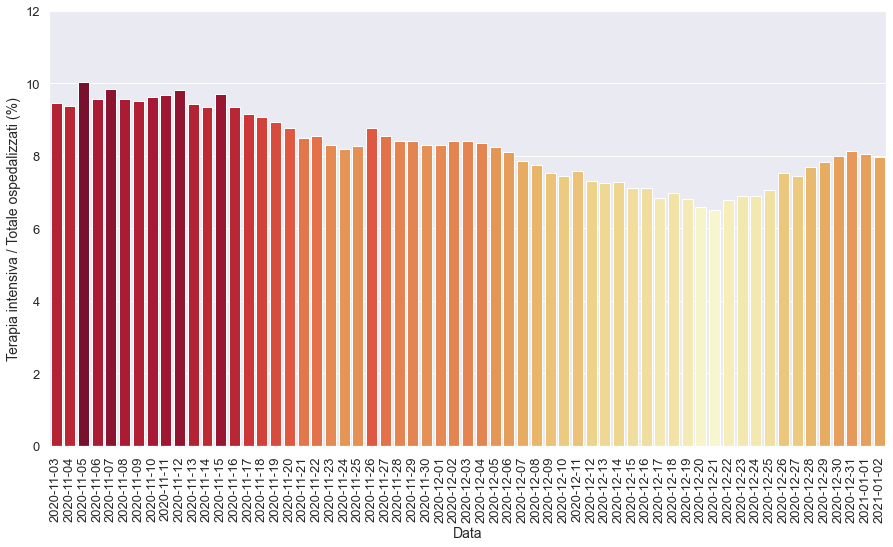

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

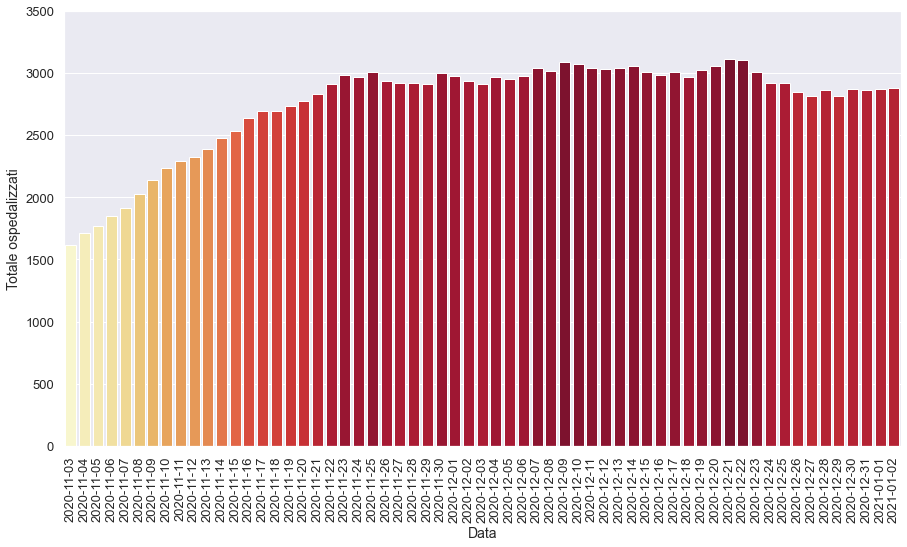

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

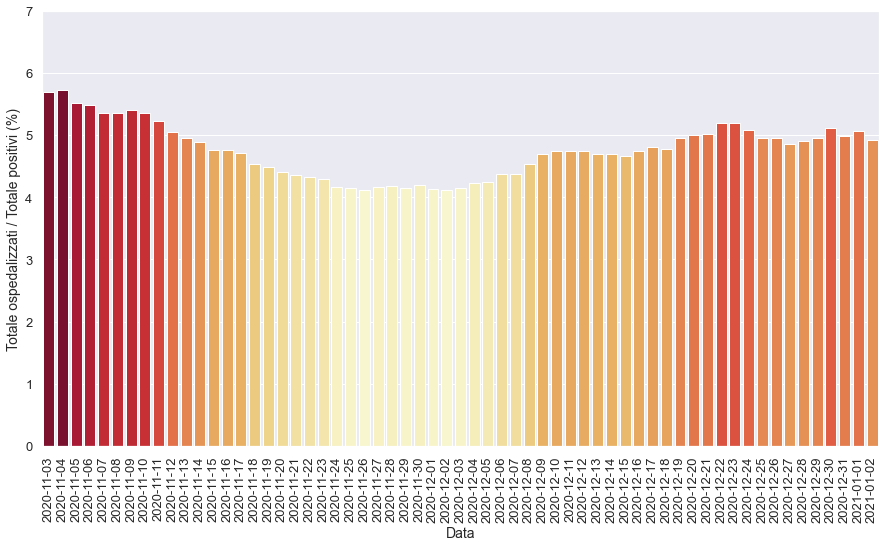

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

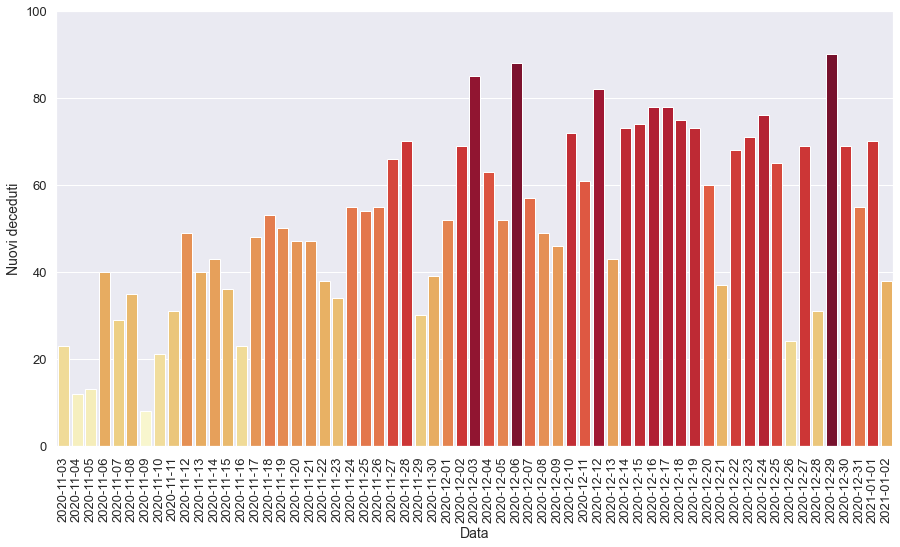

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

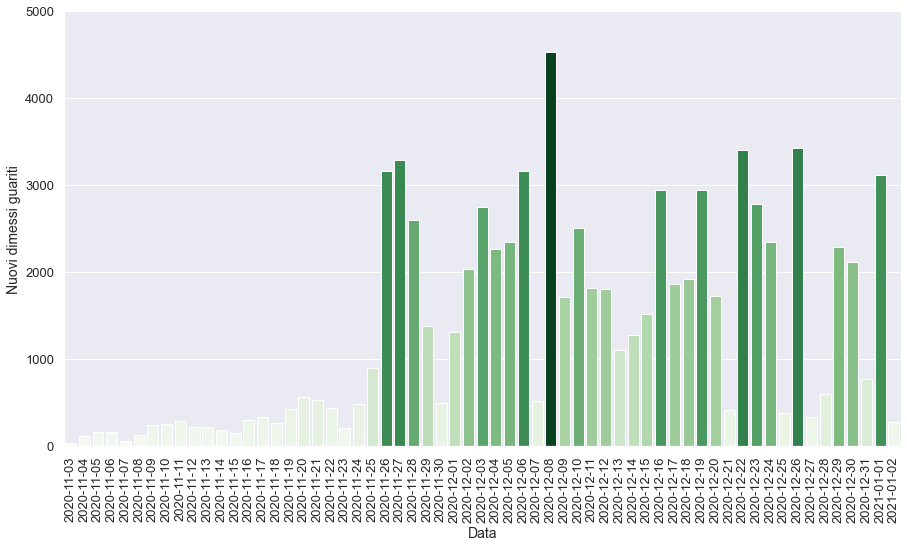

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-03T17:00:00,8,Emilia-Romagna,2668,245,2913,67324,70237,-1068,1766,...,85.0,17979.0,6242.0,-1042.0,8.41,4.15,9.82,28.29,-0.81,-1.50
1,2020-12-04T17:00:00,8,Emilia-Romagna,2717,248,2965,67091,70056,-181,2143,...,63.0,17677.0,5943.0,-233.0,8.36,4.23,12.12,36.06,1.22,-0.26
2,2020-12-05T17:00:00,8,Emilia-Romagna,2707,243,2950,66679,69629,-427,1964,...,52.0,18663.0,6140.0,-412.0,8.24,4.24,10.52,31.99,-2.02,-0.61
3,2020-12-06T17:00:00,8,Emilia-Romagna,2736,241,2977,65190,68167,-1462,1788,...,88.0,11171.0,5979.0,-1489.0,8.10,4.37,16.01,29.90,-0.82,-2.10
4,2020-12-07T17:00:00,8,Emilia-Romagna,2805,239,3044,66437,69481,1314,1891,...,57.0,9865.0,3600.0,1247.0,7.85,4.38,19.17,52.53,-0.83,1.93
5,2020-12-08T17:00:00,8,Emilia-Romagna,2781,234,3015,63507,66522,-2959,1624,...,49.0,16576.0,5111.0,-2930.0,7.76,4.53,9.80,31.77,-2.09,-4.26
6,2020-12-09T17:00:00,8,Emilia-Romagna,2857,233,3090,62753,65843,-679,1079,...,46.0,10483.0,4157.0,-754.0,7.54,4.69,10.29,25.96,-0.43,-1.02
7,2020-12-10T17:00:00,8,Emilia-Romagna,2845,229,3074,61643,64717,-1126,1453,...,72.0,17556.0,4616.0,-1110.0,7.45,4.75,8.28,31.48,-1.72,-1.71
8,2020-12-11T17:00:00,8,Emilia-Romagna,2812,231,3043,61012,64055,-662,1211,...,61.0,17459.0,5229.0,-631.0,7.59,4.75,6.94,23.16,0.87,-1.02
9,2020-12-12T17:00:00,8,Emilia-Romagna,2813,222,3035,60937,63972,-83,1807,...,82.0,17975.0,6257.0,-75.0,7.31,4.74,10.05,28.88,-3.90,-0.13


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

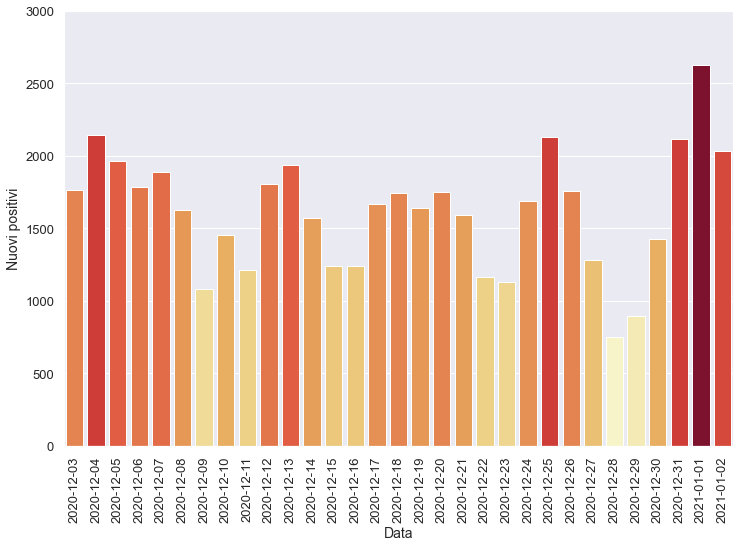

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

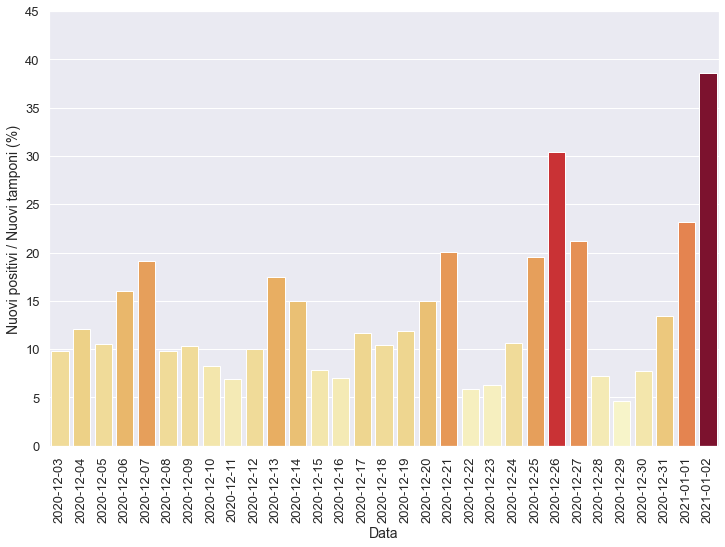

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

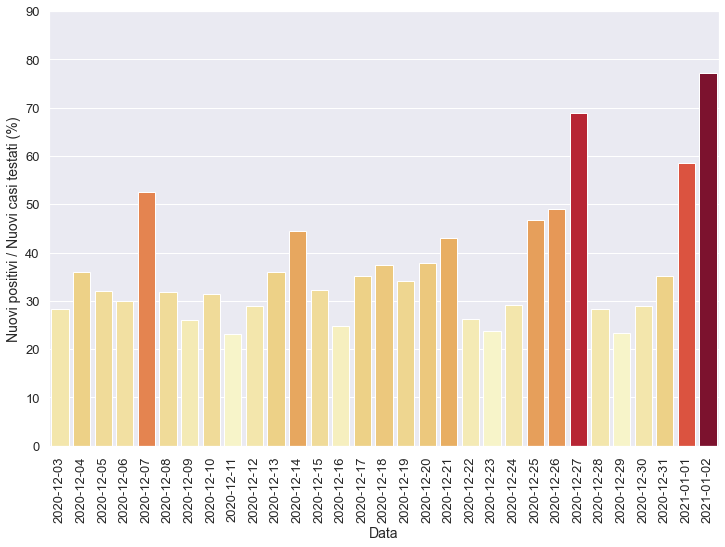

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

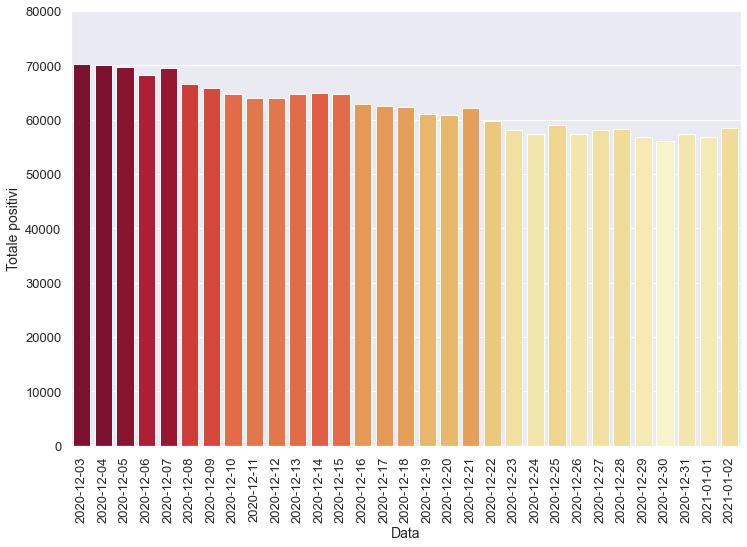

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

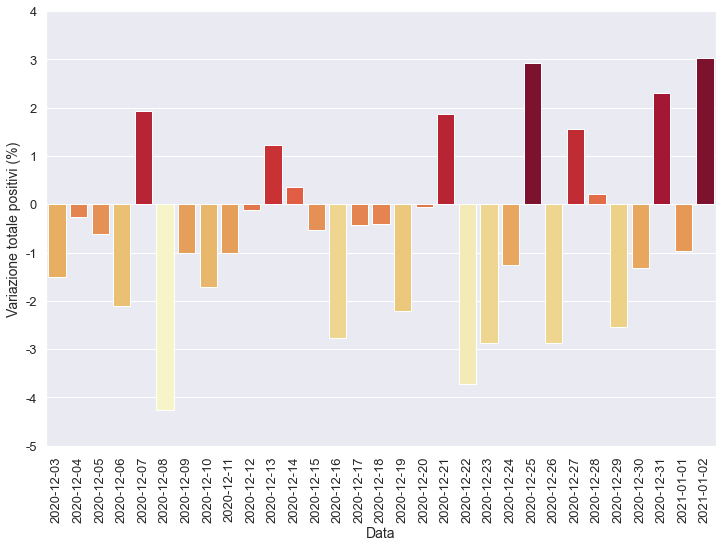

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

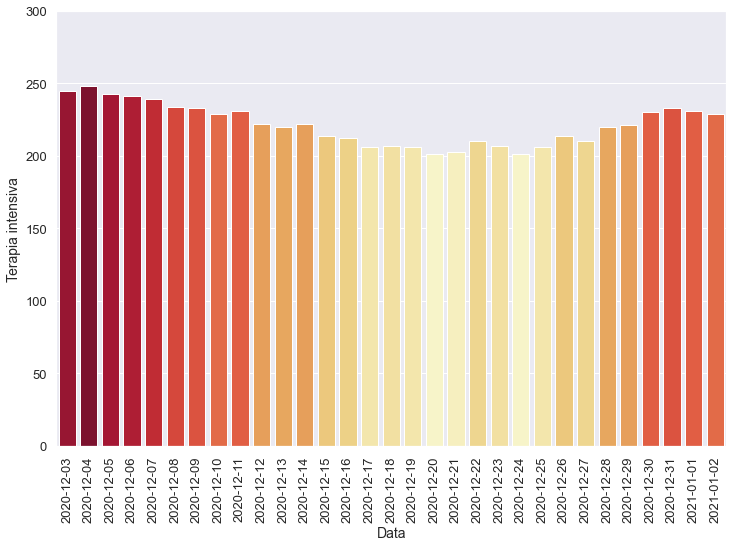

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

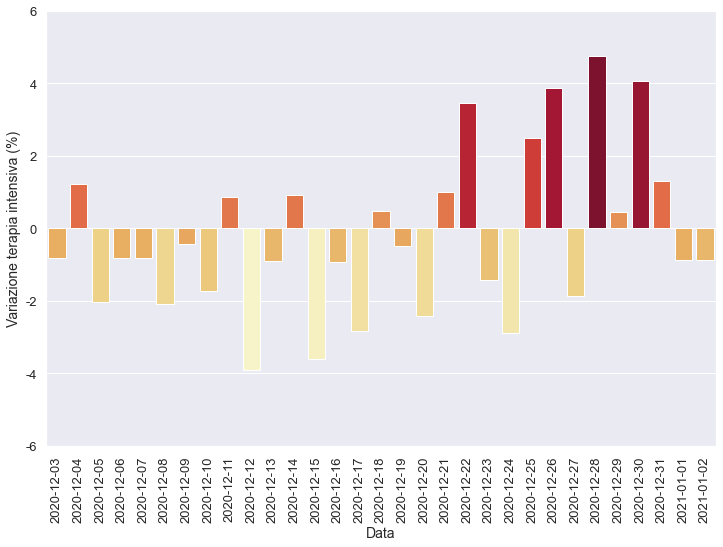

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

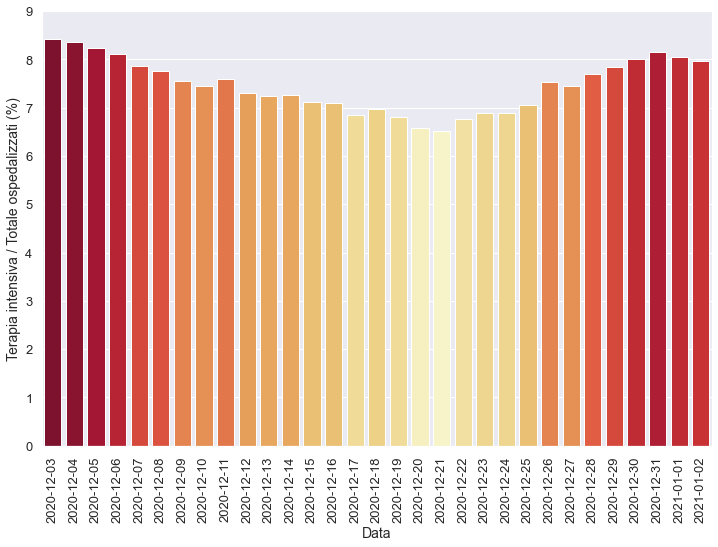

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

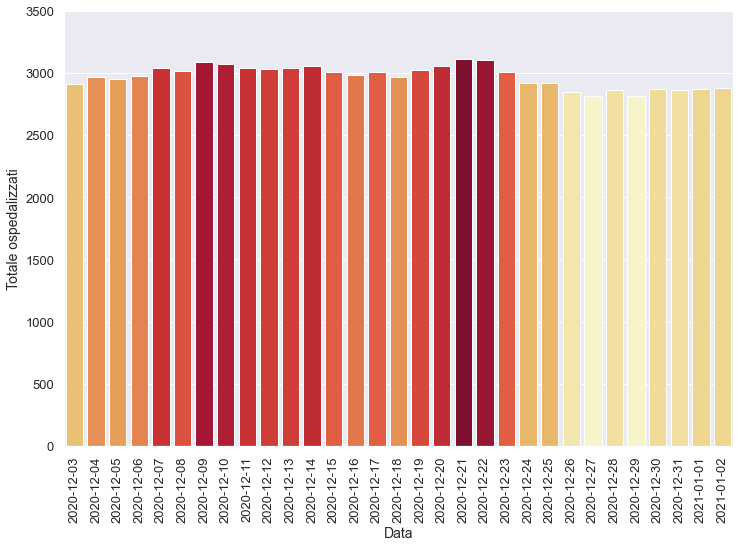

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

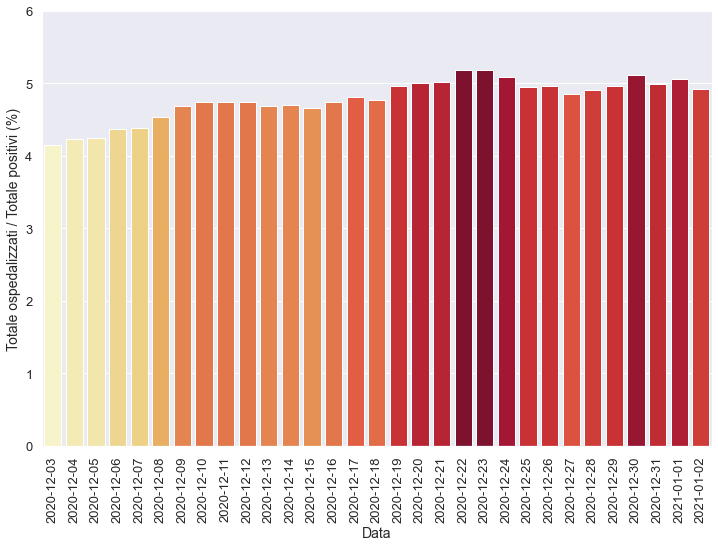

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

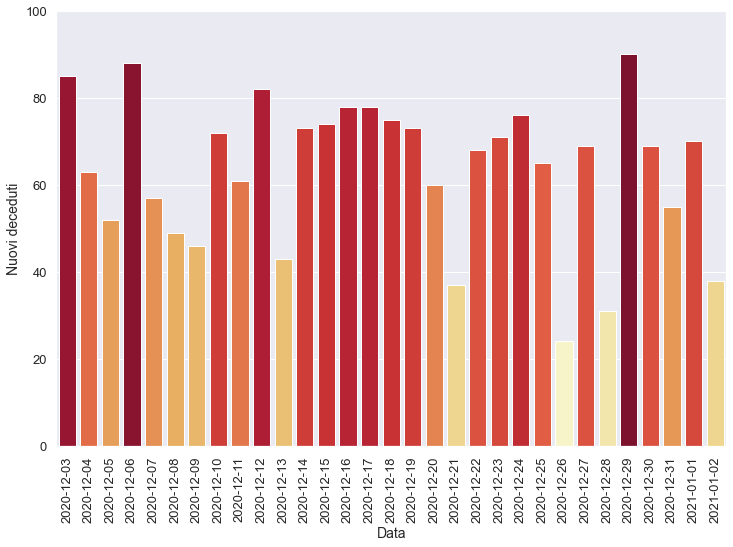

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

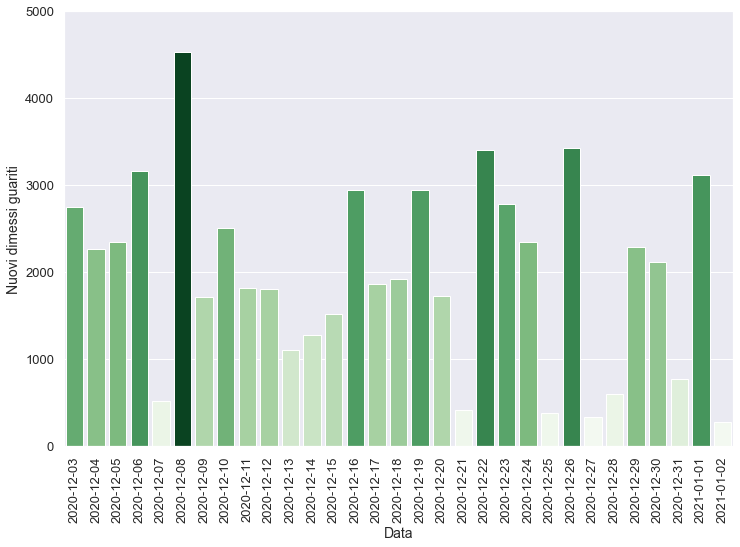

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-26T17:00:00,8,Emilia-Romagna,2630,214,2844,54443,57287,-1693,1756,...,24.0,5775.0,3587.0,-1620.0,7.52,4.96,30.41,48.95,3.88,-2.87
1,2020-12-27T17:00:00,8,Emilia-Romagna,2609,210,2819,55356,58175,888,1283,...,69.0,6066.0,1863.0,913.0,7.45,4.85,21.15,68.87,-1.87,1.55
2,2020-12-28T17:00:00,8,Emilia-Romagna,2642,220,2862,55436,58298,123,750,...,31.0,10444.0,2643.0,80.0,7.69,4.91,7.18,28.38,4.76,0.21
3,2020-12-29T17:00:00,8,Emilia-Romagna,2598,221,2819,53993,56812,-1486,894,...,90.0,19303.0,3835.0,-1443.0,7.84,4.96,4.63,23.31,0.45,-2.55
4,2020-12-30T17:00:00,8,Emilia-Romagna,2641,230,2871,53186,56057,-755,1427,...,69.0,18360.0,4928.0,-807.0,8.01,5.12,7.77,28.96,4.07,-1.33
5,2020-12-31T17:00:00,8,Emilia-Romagna,2629,233,2862,54484,57346,1289,2116,...,55.0,15735.0,6030.0,1298.0,8.14,4.99,13.45,35.09,1.30,2.30
6,2021-01-01T17:00:00,8,Emilia-Romagna,2643,231,2874,53913,56787,-559,2629,...,70.0,11372.0,4486.0,-571.0,8.04,5.06,23.12,58.60,-0.86,-0.97
7,2021-01-02T17:00:00,8,Emilia-Romagna,2649,229,2878,55628,58506,1719,2035,...,38.0,5281.0,2639.0,1715.0,7.96,4.92,38.53,77.11,-0.87,3.03


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

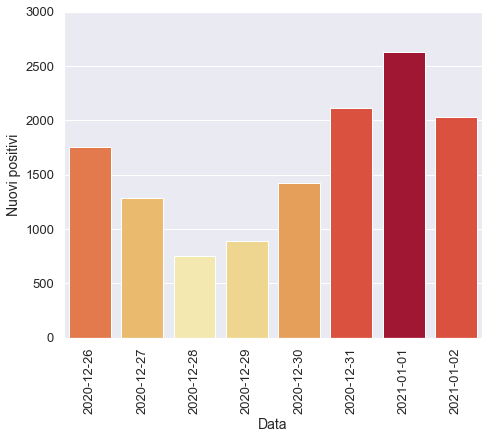

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

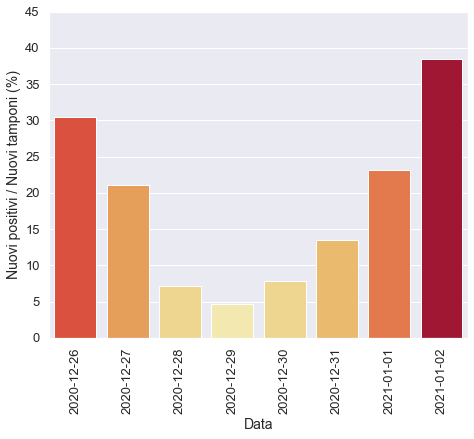

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

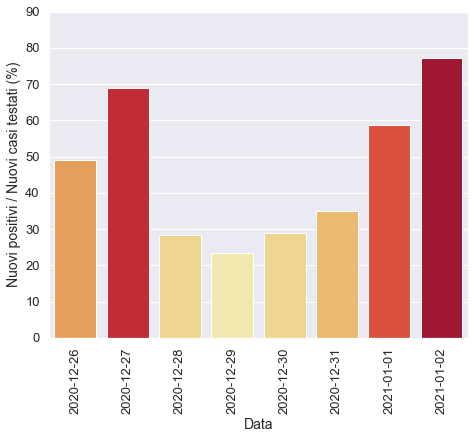

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

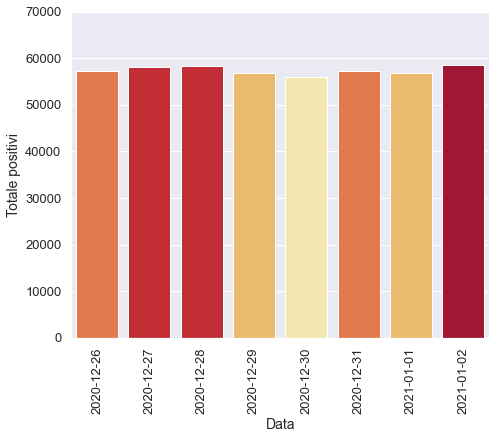

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

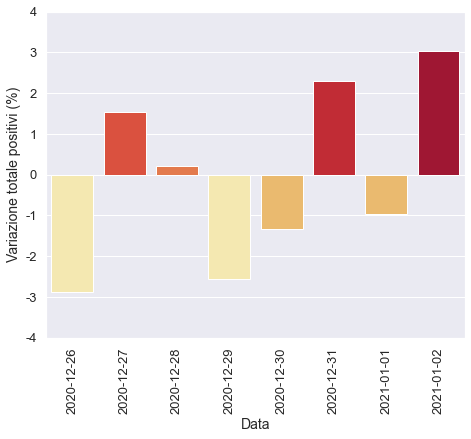

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

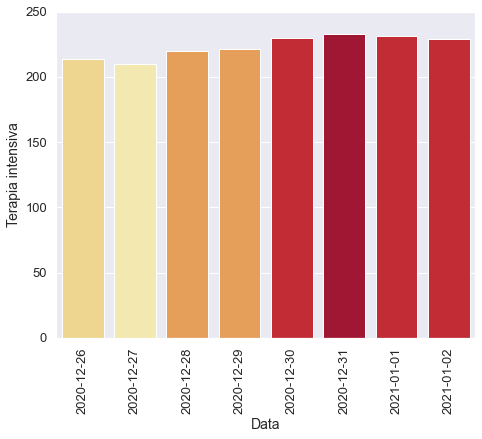

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

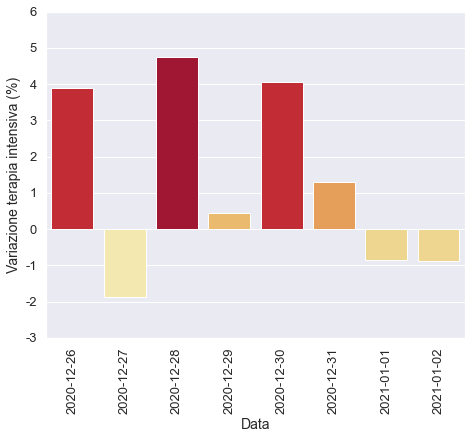

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

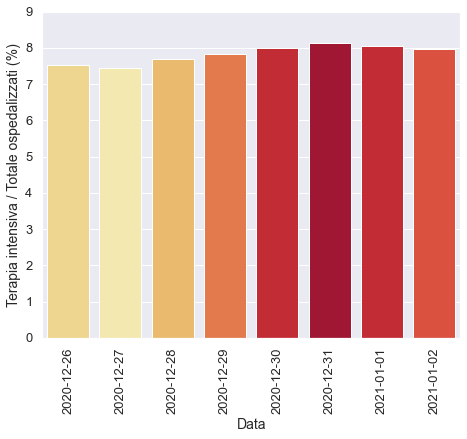

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

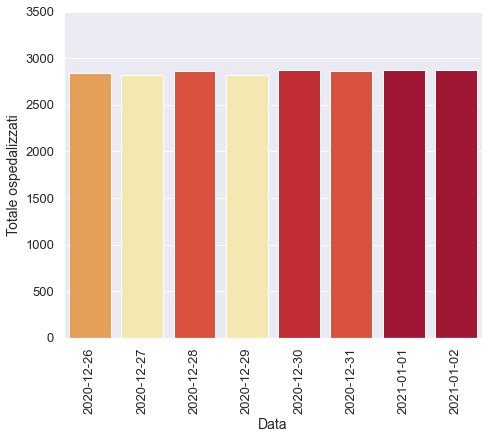

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

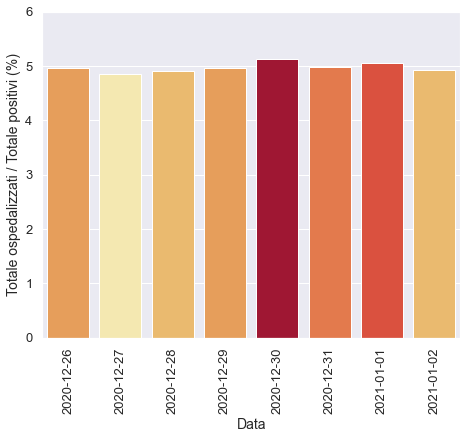

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

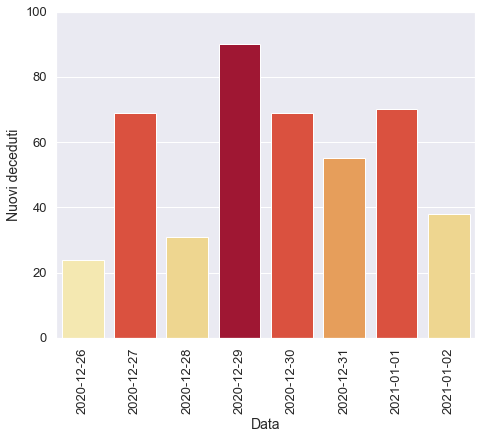

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

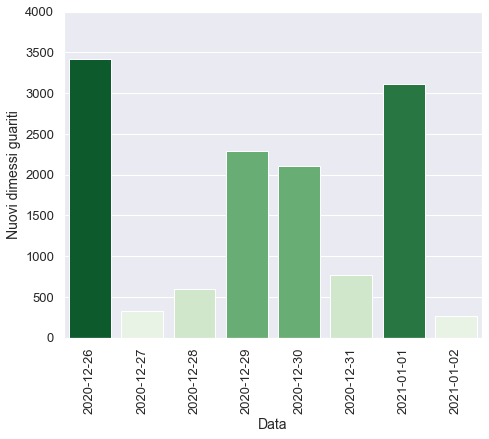

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)